# Regresión lineal

Es un método estadístico que se utiliza para modelar la relación entre dos variables a travésde una línea recta. Esta línea recta se utiliza para predecir el valor de una variable desconocida, en función del valor de una variable conocida.

Por ejemplo:

                  Precio de la casa = b + m * tamaño de la casa

Existen 2 tipos de regresión lineal:

## Simple:

Implica solo dos variables, una dependiente y una independiente. La variable independiente se utiliza para predecir la variable dependiente, mediante una línea recta.

                y = β₀+β₁*x + ε

donde:

**y** es la variable independiente.

**β** son dos constantes desconocidas que representan el punto de intersección (β₀) y la pendiente (β₁).

**ε**  es la función de pérdida.

## Múltiple

Involucra mas variables independientes para predecir una variable dependiente. En este mopdelo, se ajusta una ecuación de regresión que explica la relación entre la variable dependiente y múltiples variables independientes.

            y = β₀ + β₁x₁ + β₂x₂ +…+ βₐxₐ + ε 
            Y = β X (producto matricial)

donde: 

**y** es la variable dependiente.

**x** es una variable independiente.

**β** son coeficientes.

**ε** es la función de pérdida.



## Supuesto de linealidad

**Linealidad**: La relación de las variables debe poder representarse con una línea recta.

**Indepenencia**: El erro en una observación no debe estar relacionado con el error en otra observación.

**Homocedasticidad**: Los errores deben tener varianzas iguales, es decir, la dispersión de los errores debe ser constante.

**Normalidad**: Los errores deben seguir una distribución normal, es decir, la mayoría de los errores deben estar cerca de cero, así mismo su disprersión

## Evaluación de la regresión lineal

Las técnicas comúnes para evaluar la regresión lineal, incluyen el error cuadrático medio, el coeficiente de determinación (R²), el análisis de residuos, la prueba de significancia y la validación cruzada. Estas técnicas pueden ayudar a determinar si el modelo de regresión lineal se ajusta bien a los datos y si se adecuado para su uso.

**RMS**: El proceso de aprendizaje consiste en averiguar qué parámetros β minimizan el error cuadrático medio entre los resultados reales y los estimados.

**R²**:  Para la regresión lineal simple, R² es simplemente el cuadrado del coeficiente de correlación de Pearson

https://github.com/isadoji/FisComp/blob/main/3.3.Metodo%20de%20Minimos%20Cudrados.ipynb

Es decir, la proporción que de la variabilidad de los datos de Y respecto a su media (denominador: variabilidad total) se atribuye a la regresión (numerador: variabilidad explicada). 

# Ejemplo de Regresión Lineal Simple

## Scikit learn: Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

Text(0, 0.5, 'f(x) = 2*x + 10 + 0.2*ruido')

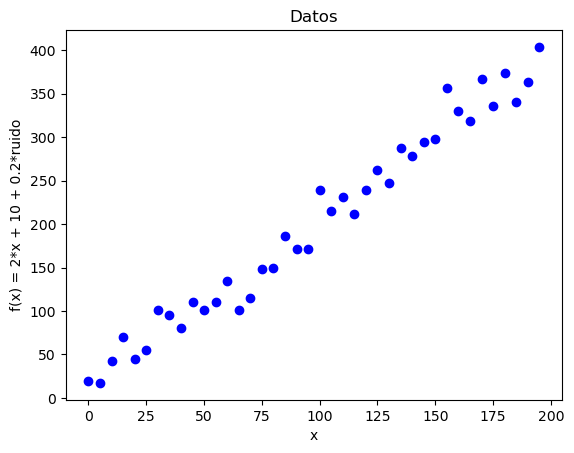

In [2]:
def f(x):  # función f(x) = 2*x + 10 + 20*ruido
    np.random.seed(42)
    y = 2*x + 10 + 20*np.random.randn(x.shape[0])
    return y
x = np.arange(0, 200, 5) 
y = f(x) 
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos')
plt.xlabel('x')
plt.ylabel('f(x) = 2*x + 10 + 0.2*ruido')

m = [1.91835218], b = 13.58792525736692
Error Cuadrático Medio (MSE) = 331.8522012927901 , Raíz del Error Cuadrático Medio (RMSE) = 18.216810952875097,Coeficiente de Determinación R2 = 0.9736439121020338
Coeficiente de Determinación R2 = 0.9736439121020338


Text(0, 0.5, 'y')

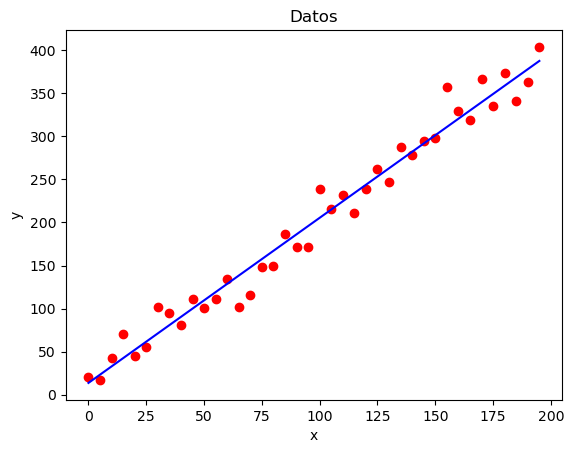

In [3]:
from sklearn.linear_model import LinearRegression # Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.metrics import mean_squared_error, r2_score # error
regresion_lineal = LinearRegression() # crear lel objeto de Regresión Linear
regresion_lineal.fit(x.reshape(-1,1), y) #Entrenamos nuestro modelo
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1)) #predicciones 
# Error Cuadrado Medio
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print('m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_)) # parámetros que ha estimado la regresión lineal
print('Error Cuadrático Medio (MSE) = ' + str(mse) + ' , Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse) + ',Coeficiente de Determinación R2 = ' + str(r2))
print('Coeficiente de Determinación R2 = ' + str(r2))
plt.scatter(x, y, color="red")
plt.plot(x, prediccion_entrenamiento, color="blue")
plt.title('Datos')
plt.xlabel('x')
plt.ylabel('y')


# Ejemplo de Regresión Lineal con base de datos

In [4]:
import pandas as pd
dataset = pd.read_csv('../datasets/salary_data.csv')
#Independiente, tomara todos los valores menos la ultima
x = dataset.iloc[:, :-1].values
#Dependiente            
y = dataset.iloc[:, 1].values


In [5]:
dataset


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
#División de datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state=0)

m = [9345.94244312], b = 26816.192244031183
Mean squared error: 21026037.33
Coefficient of determination: 0.97


Text(0, 0.5, 'Salarios')

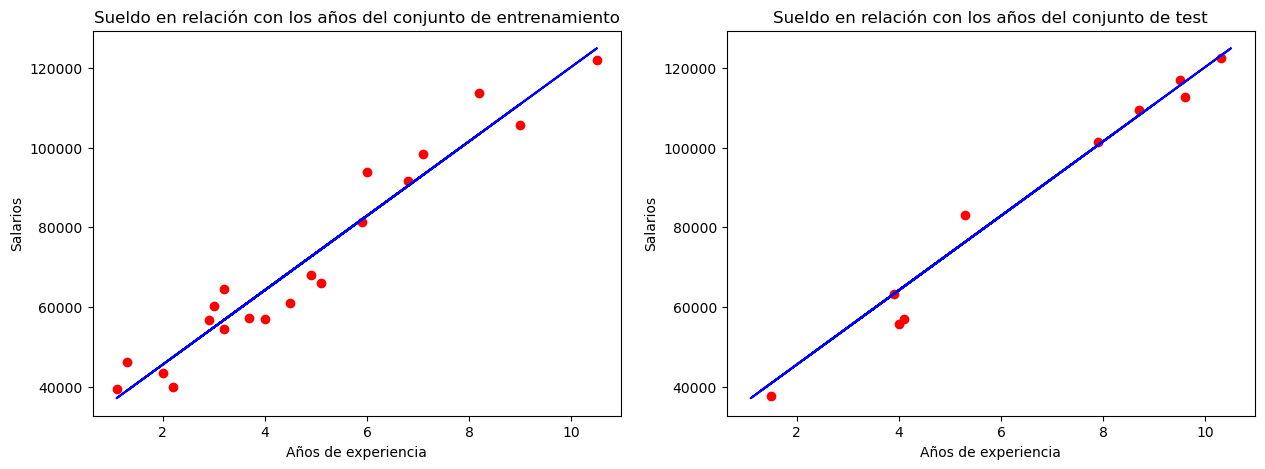

In [7]:
#Crear modelo de regresión lineal simple con el conjunto de entrenamiento

#Ajustar el modelo usando el modelo de la clase (debe tener mismo numero de filas tanto x como y)
regresion_lineal.fit(x_train, y_train)
#Creando un vector de predicciones, se debe tomar solo los valores independientes
y_pred = regresion_lineal.predict(x_test)

# The coefficients
print('m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_)) 
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, color="red",label='Sample data')
plt.plot(x_train, regresion_lineal.predict(x_train), color="blue",label='Regression model')
plt.title("Sueldo en relación con los años del conjunto de entrenamiento")
plt.xlabel("Años de experiencia")
plt.ylabel("Salarios")


plt.subplot(1,2,2)
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, regresion_lineal.predict(x_train), color="blue")
plt.title("Sueldo en relación con los años del conjunto de test")
plt.xlabel("Años de experiencia")
plt.ylabel("Salarios")


In [8]:
datos = pd.read_csv('../datasets/Salary_Data.csv')
datos

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891
5,2.9,23.0,56642
6,3.0,23.0,60150
7,3.2,23.3,54445
8,3.2,23.3,64445
9,3.7,23.6,57189


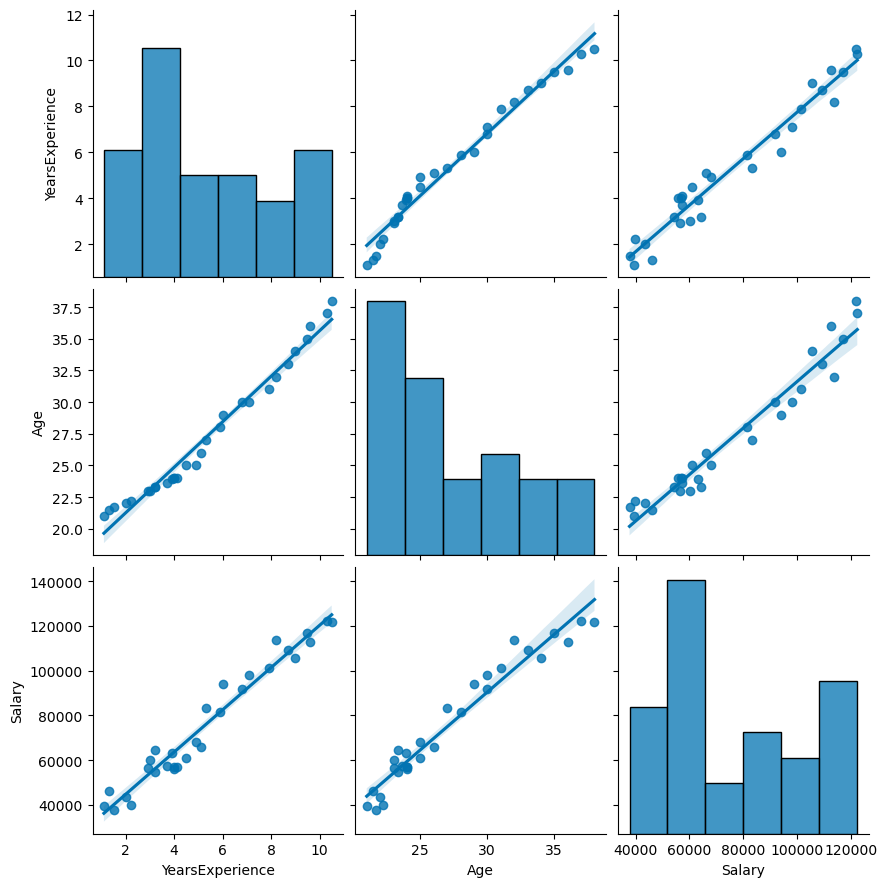

In [9]:
# Visualización de los datos
import seaborn as sns  # Gráficos

sns.set_palette('colorblind')
sns.pairplot(datos, height=3,kind = 'reg')

In [10]:
X = datos.iloc[:,2:3]
Y = datos.iloc[:, 0:2]

In [11]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state=0)

In [12]:
regresion_lineal.fit(X_train,Y_train)

LinearRegression()

In [13]:
Y_pred = regresion_lineal.predict(X_test)

In [14]:
print('m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_)) 
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

m = [[0.00010038]
 [0.0001791 ]], b = [-2.39957519 13.47498317]
Mean squared error: 0.82
Coefficient of determination: 0.96


<div> <img src="fig/LR.png" alt="Drawing" style="width: 1000px;"/></div>

https://aprendeia.com/ventajas-y-desventajas-de-los-algoritmos-de-clasificacion-machine-learning/


In [16]:

#Escalado de variables
#crear un escalador estandar    
from sklearn.preprocessing import StandardScaler
#Diciendole entre que valores debe escalar
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
#Escalando el test y no se debe volver a crear un escalador (sc_x)
#Y solo le diremos transform para que escale con el test 
x_test = sc_x.transform(x_test)


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_test

array([[-1.27636084],
       [ 2.20103092],
       [-0.24894964],
       [-0.32798127],
       [ 1.88490439],
       [ 1.56877787],
       [ 1.92442021],
       [-0.28846545],
       [ 0.22524015],
       [ 1.25265135]])

In [22]:
# Explicación de la varianza
# Creamos un vector con el porcentaje de influencia de la varianza 
# para las dos variables resultantes del conjunto de datos
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.])